Using TensorFlow backend.



Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0357
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0058
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0057
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0053
Epoch 7/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 11s 9ms/step - 

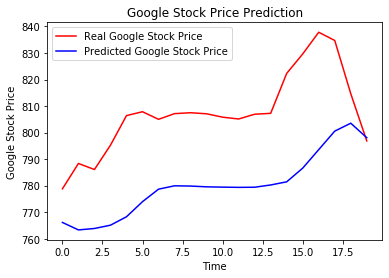

In [1]:
#RNN 
#MAKING LSTM IN RODER TO OBSERVE UPWARD AND DOWNWARD TREND OF GOGGLE STOCK PRICE
#IMPLEMENT  DROPOUT REGULARIZATION TO STOP OVERFITTING
#5 YEARS GOGGLE STOCK PRICE
#part 1 data preprocessing
#importing the libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

#importing the training set
dataset_train=pd.read_csv('C:\\Users\\cw\\Desktop\\Deep_Learning_A_Z\\Recurrent_Neural_Networks\\Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)


#Creating a Data Structure with 60 timestep and 1 output
x_train=[]
y_train=[]
for i in range (60,1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train=np.array(x_train), np.array(y_train) 


#reshaping the  data(to adding new dimension in numpy array)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#part 2 building the  RNN
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#initializing the RNN
#We use regression because in this scenario we are predicting continuous values
regressor=Sequential()

#To avoid overfitting we add dropout regulariser

#adding the first LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#adding the second LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#adding the third LSTM layer and some dropout regularisation

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#adding the fourth LSTM layer and some dropout regularisation

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units=1))

#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
#Fitting the RNN to the Training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

#PART 3 making the predictions and visualizing the results
#getting the real stock price of 2017
dataset_test=pd.read_csv('C:\\Users\\cw\\Desktop\\Deep_Learning_A_Z\\Recurrent_Neural_Networks\\Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

#Getting the predicted stock price of 2017

dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range (60,80):
    x_test.append(inputs[i-60:i, 0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

#Visualising the results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() 
